# Word2Vec with LSTM:

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import os

from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix

from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
#stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Helper Functions for Text cleaning::

In [ ]:
import re
def decontracted(phrase):
  """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""

  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"won\’t", "will not", phrase)
  phrase = re.sub(r"can\’t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)

  phrase = re.sub(r"n\’t", " not", phrase)
  phrase = re.sub(r"\’re", " are", phrase)
  phrase = re.sub(r"\’s", " is", phrase)
  phrase = re.sub(r"\’d", " would", phrase)
  phrase = re.sub(r"\’ll", " will", phrase)
  phrase = re.sub(r"\’t", " not", phrase)
  phrase = re.sub(r"\’ve", " have", phrase)
  phrase = re.sub(r"\’m", " am", phrase)

  return phrase

#processed_text = decontracted(processed_text)
#print(processed_text)

def remove_special_character(phrase, remove_number=False):
  """remove_special_character takes text and removes special charcters.
     ref: https://stackoverflow.com/a/18082370/4084039"""

  phrase = re.sub("\S*\d\S*", "", phrase).strip()
  if remove_number:
    phrase = re.sub('[^A-Za-z]+', ' ', phrase)
  else:
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
  return phrase

# processed_text = remove_special_character(processed_text, True)
# print(processed_text)

def remove_stop_words(text):
    stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', \
                "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', \
                'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", \
                'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', \
                'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', \
                'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', \
                'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
                'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', \
                'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', \
                'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', \
                'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', \
                'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", \
                'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", \
                'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', \
                "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', \
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", \
                'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])
    return ' '.join(e.lower() for e in text.split() if e.lower() not in stopwords)

# ref: https://gist.github.com/sebleier/554280

# processed_text = ' '.join(e.lower() for e in processed_text.split() if e.lower() not in stopwords)
# print(processed_text)

def lemmatize_text(text_data):
  """lem_text takes text and lemmatize it using WordNetLemmatizer.
     ref: https://stackoverflow.com/a/25535348"""
  lem = WordNetLemmatizer()
  n_text = []
  for word in text_data.split(' '):
    n_word = lem.lemmatize(word, pos='a')
    n_word = lem.lemmatize(n_word, pos='v')
    n_text.append(n_word)

  return ' '.join(n_text)

# processed_text = lem_text(processed_text)
# print(processed_text)

def stem_and_stopwords(text):
    stemmer = nltk.stem.SnowballStemmer('english')
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems


def clean_text(text):
    text = decontracted(text)
    text = remove_special_character(text)
    text = remove_stop_words(text)
    text = lemmatize_text(text)
    #text = stem_and_stopwords(text)
    return text


def find_max_list_idx(list):
    list_len = [len(i) for i in list]
    return np.argmax(np.array(list_len))

In [ ]:
# Using GoogleCollab:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.shape

(425, 11)

In [ ]:
data.head(2)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


In [ ]:
#target_column = 'Potential Accident Level'
target_column = 'Accident Level'
target={'I':0, 'II':1, 'III':2, 'IV':3, 'V':4, 'VI':5}

data['target']=data[target_column].map(target)

In [ ]:
df = data[['target', 'Description']]

In [ ]:
df.Description = df.Description.apply(clean_text)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.head(2)

,target,Description
0,0,remove drill rod jumbo maintenance supervisor ...
1,0,activation sodium sulphide pump pip uncouple s...


In [ ]:
#X_train, X_test = train_test_split(data[['Description', 'target']], test_size=0.2, random_state=111)

###Convert target to category::

In [ ]:
df['target'].astype('category')

0      0
1      0
2      0
3      0
4      3
      ..
420    0
421    0
422    0
423    0
424    0
Name: target, Length: 425, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

---

In [ ]:
max_idx = find_max_list_idx(df['Description'])
print(max_idx)

174


In [ ]:
print(len(df['Description'][max_idx]))



622


In [ ]:
df['Description'][max_idx]

'level gallery hold activity bolter equipment no operator perform drill first hole support right gable drill end drill rod break leave thread inside drill machine shank operator assistant decide make two empty percussion attempt free thread shank without success third attempt assistant enter corrugate iron central hole rest bar embed shank generate pressure moment operator activate percussion generate movement shank hit palm victim leave hand generate describe injury worker wear safety gloves time accident end corrugate iron contact leave hand shape like cane worker time accident position roof support mesh split set'

In [ ]:
MAX_SEQUENCE_LENGTH = len(df['Description'][max_idx])

# Create Word2Vec from gensim::

##Text Clean for Gensim::

In [ ]:
desc_lines = list()
lines = df['Description'].values.tolist()

for line in lines:   
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words    
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    desc_lines.append(words)

In [ ]:
len(desc_lines)


425

In [ ]:
import gensim 

EMBEDDING_DIM = 100
# train word2vec model
model = gensim.models.Word2Vec(sentences=desc_lines, size=EMBEDDING_DIM, window=5, workers=4, min_count=1)
# vocab size
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 2372


In [ ]:
# save model in ASCII (word2vec) format
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
words[10:15]

['centralizer', 'facilitate', 'removal', 'see', 'mechanic']

In [ ]:
model.wv.most_similar('mechanic')

[('fall', 0.9878702163696289),
 ('use', 0.9869433045387268),
 ('right', 0.9860049486160278),
 ('employee', 0.98548424243927),
 ('moment', 0.9850805401802063),
 ('work', 0.9850097298622131),
 ('leave', 0.9849992394447327),
 ('operator', 0.9848170876502991),
 ('hand', 0.9846010208129883),
 ('activity', 0.9845645427703857)]

In [ ]:
embeddings_index = {}
f = open(os.path.join('', 'embedding_word2vec.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [ ]:
# total_descriptions = X_train + X_test
# max_length = 150 # try other options like mean of sentence lengths
# max_length = MAX_SEQUENCE_LENGTH

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(desc_lines)
sequences = tokenizer_obj.texts_to_sequences(desc_lines)

# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

desc_pad = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

X = desc_pad

print('Shape of Desc tensor:', X.shape)



Found 2372 unique tokens.
Shape of Desc tensor: (425, 622)


In [ ]:
y = pd.get_dummies(df['target']).values
print('Shape of label tensor:', y.shape)


Shape of label tensor: (425, 5)


### Model with imblearn::

In [ ]:
!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

# sm = SMOTE(random_state = 111, k_neighbors=4)
# X_train_res, y_train_res = sm.fit_sample(X_train_pad, y_train,)

from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=111, categorical_features=[0,1,2,3,4])
X_res, y_res = sm.fit_resample(X, y)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Before Sampling: X_train: {}, y_train: {}'.format(X.shape, y.shape))

Before Sampling: X_train: (425, 622), y_train: (425, 5)


In [ ]:
print('After Sampling: X: {}, y: {}'.format(X_res.shape, y_res.shape))

After Sampling: X: (1580, 622), y: (1580, 5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.10, random_state = 1122)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1422, 622) (1422, 5)
(158, 622) (158, 5)


In [ ]:
EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
print(num_words)


2373


### The above model was overfitting, so increase bias: Add drop out layers::

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant

# Model#1:
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
#Accuracy: 39.87%
# array([[12,  7, 10,  2,  0],
#        [ 2,  5,  9,  4,  0],
#        [ 5,  6, 12, 12,  2],
#        [ 0,  2,  9, 18,  4],
#        [ 0,  0,  8, 13, 16]])

#Model#2: -> 
# model = Sequential()
# model.add(Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dropout(0.2)) #
# model.add(Flatten()) #
# model.add(Dense(5, activation='softmax'))
# # Accuracy: 40.51%
# # CM Matrix::
# # array([[15,  4,  7,  5,  0],
# #        [ 2, 11,  5,  2,  0],
# #        [ 7, 11,  9,  9,  1],
# #        [ 1,  6,  9, 15,  2],
# #        [ 0,  5,  5, 13, 14]])



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 622, 100)          237300    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 622, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 355,193
Trainable params: 355,193
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:

h = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test), verbose=2, shuffle=True)


Epoch 1/10
12/12 - 43s - loss: 1.6063 - accuracy: 0.2314 - val_loss: 1.6006 - val_accuracy: 0.2152
Epoch 2/10
12/12 - 39s - loss: 1.5566 - accuracy: 0.3361 - val_loss: 1.5425 - val_accuracy: 0.3291
Epoch 3/10
12/12 - 38s - loss: 1.4670 - accuracy: 0.3685 - val_loss: 1.4874 - val_accuracy: 0.3165
Epoch 4/10
12/12 - 39s - loss: 1.4250 - accuracy: 0.4086 - val_loss: 1.4646 - val_accuracy: 0.4494
Epoch 5/10
12/12 - 39s - loss: 1.2753 - accuracy: 0.4993 - val_loss: 1.3777 - val_accuracy: 0.4241
Epoch 6/10
12/12 - 38s - loss: 1.1303 - accuracy: 0.5591 - val_loss: 1.3371 - val_accuracy: 0.4114
Epoch 7/10
12/12 - 39s - loss: 0.9822 - accuracy: 0.6224 - val_loss: 1.3593 - val_accuracy: 0.4177
Epoch 8/10
12/12 - 39s - loss: 0.8138 - accuracy: 0.6857 - val_loss: 1.7605 - val_accuracy: 0.3101
Epoch 9/10
12/12 - 38s - loss: 0.7331 - accuracy: 0.7370 - val_loss: 1.4980 - val_accuracy: 0.4051
Epoch 10/10
12/12 - 38s - loss: 0.6115 - accuracy: 0.7834 - val_loss: 1.5796 - val_accuracy: 0.3734


###Evaluation:

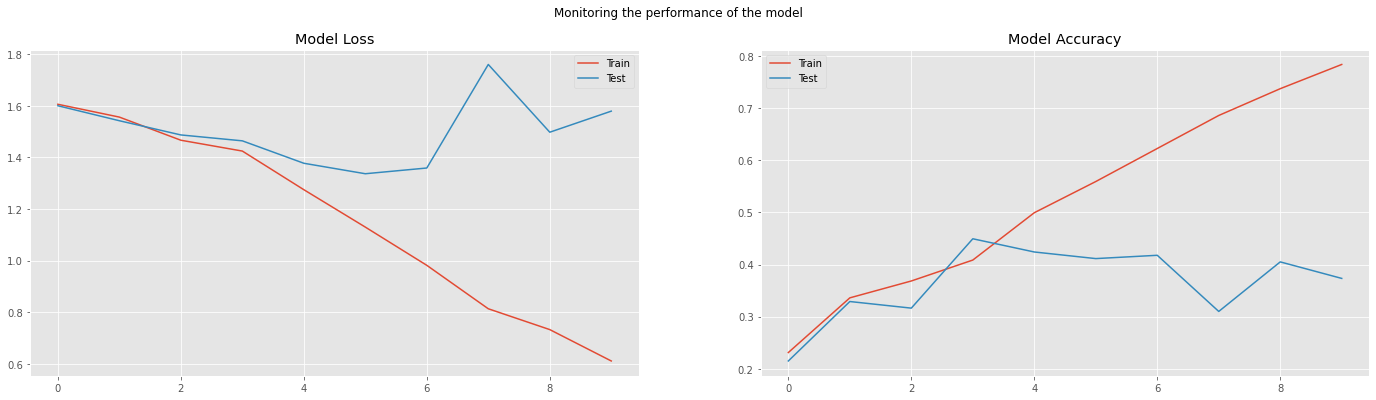

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 6))
f.suptitle('Monitoring the performance of the model')

loss = 'loss'
val_loss = 'val_loss'
accuracy = 'accuracy'
val_accuracy = 'val_accuracy'

#accuracy = 'categorical_hinge'
#val_accuracy = 'val_categorical_hinge'


ax1.plot(h.history['loss'], label = 'Train')
ax1.plot(h.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])




ax2.plot(h.history[accuracy], label = 'Train')
ax2.plot(h.history[val_accuracy], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [ ]:
print('Testing...')
score, acc = model.evaluate(X_test, y_test, batch_size=10)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))

Testing...
16/16 [==============================] - 2s 116ms/step - loss: 1.5796 - accuracy: 0.3734
Test score: 1.5796277523040771
Test accuracy: 0.3734177350997925
Accuracy: 37.34%


In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 188ms/step - loss: 1.5796 - accuracy: 0.3734


[1.5796277523040771, 0.3734177350997925]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_proba(X_test, batch_size=10, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
print(classification_report(y_test_bool, y_pred_bool))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


16/16 [==============================] - 2s 113ms/step
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        31
           1       0.24      0.45      0.31        20
           2       0.22      0.19      0.20        37
           3       0.32      0.39      0.35        33
           4       0.82      0.49      0.61        37

    accuracy                           0.37       158
   macro avg       0.41      0.38      0.38       158
weighted avg       0.43      0.37      0.39       158



In [ ]:
confusion_matrix(y_test_bool, y_pred_bool)

array([[12, 10,  8,  1,  0],
       [ 3,  9,  5,  3,  0],
       [ 8,  8,  7, 13,  1],
       [ 1,  7,  9, 13,  3],
       [ 1,  4,  3, 11, 18]])



---



---

